# Dignitas Ukraine Donations Analytics

In [27]:
# ETL

import pandas as pd

df = pd.read_excel('./data/Dignitas Ukraine donations.xlsx', sheet_name='Chase5315_Activity_20230607',index_col=None, 
                   usecols = 'A, B, C, D')

#df = df[df['Gross']>0]
#df[df['Description'].str.contains('zelle', case=False, regex=True)]['Description'] = 'Zelle'

def extract_donation_method(word):
    df['Description'] = df['Description'].str.replace('.*' + word + '.*', word, regex=True)

word = 'Zelle'
extract_donation_method(word)

word = 'Square'
extract_donation_method(word)

word = 'VENMO'
extract_donation_method(word)

word = 'GOOGLE'
extract_donation_method(word)

word = 'CASH'
extract_donation_method(word)

word = 'DEPOSIT'
extract_donation_method(word)

## Totally raised

In [19]:
'${:,.2f}'.format(df['Amount'].sum())

'$7,531.25'

## Donations stats

In [20]:
pd.DataFrame(round(df['Amount'].describe()/10)*10)

,Amount
count,20.0
mean,300.0
std,790.0
min,-0.0
25%,0.0
50%,30.0
75%,200.0
max,3670.0


## Most common donation amounts

In [22]:
from collections import Counter

most_common = pd.DataFrame(Counter(df['Amount']).most_common(10),columns =['Amount', 'Frequency'])
most_common['Amount'] = round(most_common['Amount'] / 10)*10
most_common = most_common.groupby('Amount').sum().sort_values(by='Frequency', ascending = False)
most_common[most_common.index > 0]


,Frequency
Amount,
40.0,3
10.0,1
230.0,1
640.0,1


In [24]:
'${:,.2f}'.format(round(df['Amount'].groupby(df['Posting Date'].dt.to_period('D')).sum().median(), 2))

'$202.77'

## Donations by date

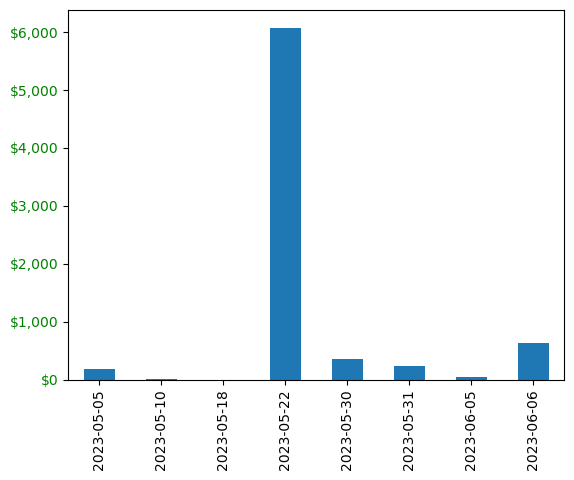

In [25]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
fig, ax = plt.subplots()


df['Amount'].groupby(df['Posting Date'].dt.to_period('D')).sum().plot(kind='bar', xlabel='')

# dollar ticks
ax.yaxis.set_major_formatter('${x:,.0f}')
ax.yaxis.set_tick_params(which='major', labelcolor='green',
                         labelleft=True, labelright=False)
plt.show()

## Donations by payment method

In [26]:
pd.DataFrame(df.groupby('Description').sum('Amount').sort_values(
    by='Amount', ascending=False)['Amount'])

,Amount
Description,
DEPOSIT,4610.00
Zelle,2674.00
VENMO,230.54
CASH,11.00
Square,5.64
GOOGLE,0.07


# Are you joining Dignitas Ukraine Donors?!